# DFT-Based Image Compression

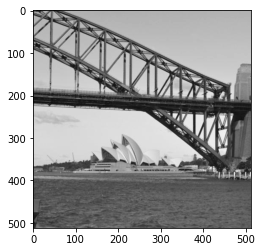

In [48]:
import numpy as np
import matplotlib.pyplot as plt
f = np.array(plt.imread('operahall.jpg'), dtype=float)
plt.imshow(f,cmap='gray')

We would like to compress the image above using DFT-based image compression. 

Let's look at the top-left sub-block of pixels and perform a 2D fast fourier transform on this block

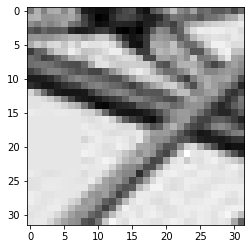

In [49]:
sub_block = f[:32, :32] 
plt.imshow(sub_block, cmap='gray')

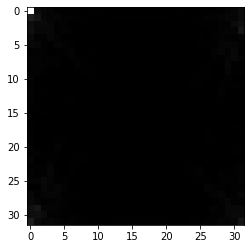

In [50]:
from scipy import fft
sub_block_fft = fft.fft2(sub_block)
magnitudes = abs(sub_block_fft)
plt.imshow(magnitudes, cmap='gray')

The first pixel is significantly brighter than the rest. The first pixel shows the magnitude of $F_{(0, 0)}$, which is the average of all the samples and known as the direct current

Let's zero out the DC coefficient to better visualize the data

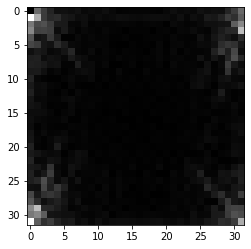

In [51]:
magnitudes[0][0] = 0
plt.imshow(magnitudes, cmap='gray')

It's time to implement the compress function

In [52]:
# compress(X, tol) takes in an image as an array of floats X,
#   and the drop tolerance tol, and returns a tuple [Y, drop]
#   which contains the compressed image Y as another array of
#   floats and the computed drop ratio.
def compress(X, tol):
    h, w = X.shape
    final_compressed = np.zeros_like(X)
    nonzero_original = 0
    nonzero_compressed = 0
    for i in range(0, h, 32):
        for j in range(0, w, 32):
            cur_block = X[i:i+32, j:j+32]
            cur_block_fft = fft.fft2(cur_block)
            
            F_max = np.max(np.abs(cur_block_fft))
            
            bool_table = np.abs(cur_block_fft) > (F_max * tol)
            cur_block_fft_compressed = cur_block_fft * bool_table
            
            nonzero_original += np.count_nonzero(cur_block_fft)
            nonzero_compressed += np.count_nonzero(cur_block_fft_compressed)

            cur_block_compressed = np.real(fft.ifft2(cur_block_fft_compressed))

            final_compressed[i:i+32, j:j+32] = cur_block_compressed

    nonzero_dropped = nonzero_original - nonzero_compressed
    drop_ratio = nonzero_dropped / nonzero_original

    return final_compressed, drop_ratio

Now let's compress the original image with different tolerance values:

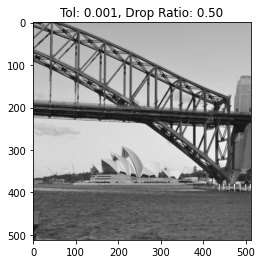

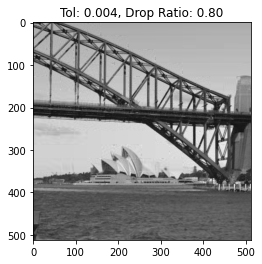

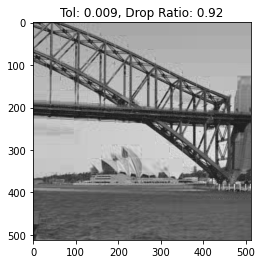

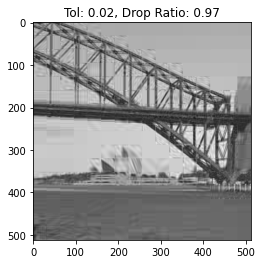

In [53]:
tolerances = [0.001, 0.004, 0.009, 0.02]
results = [compress(f, tol) for tol in tolerances]
for result, tol in zip(results, tolerances):
    plt.imshow(result[0], cmap='gray')
    plt.title(f'Tol: {tol}, Drop Ratio: {result[1]:.2f}')
    plt.show()

Visualizing the error in the image with the lease compression:

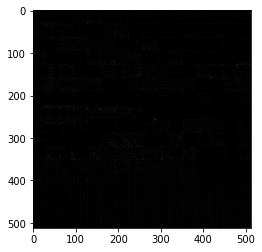

In [54]:
least_compressed_image = results[0][0]
error_image = np.abs(f - least_compressed_image)

plt.imshow(error_image, cmap='gray')
plt.show()